Yacub Bholat  
Data Analysis and Visualization Boot Camp  
Matplotlib Homework - The Power of Plots  
Due: 21 December 2019  

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import os

# globally matplotlib formatting
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 14})

# Function to generate plot with/without error bars
def plot_df_error_bars(df,
                       std_error_df=None,
                       cols=lambda df: df.columns):
    df = df[cols]
    
    # if error bar df is passed, accept it
    if type(std_error_df) == pd.core.frame.DataFrame:
        std_error_df = std_error_df[cols]
    # otherwise, create a None dict
    else:
        std_error_df = {col: None for col in df.columns}
    
    ls = ['-', ':', '-', '-', '-.', '--', '--', '--', ':', '-.'] # line style list
    marker = ['.', 'o', 'v', '^', '<', '>', 's', '*', '+', 'x'] # marker style list
    padding = 3 # padding for graph limits
    
    # plot the df
    for i, col in enumerate(df):
        plt.errorbar(df.index, # x values
                     df[col], # y values
                     yerr=std_error_df[col], # error bars
                     ls=ls[i], # iterate through line style list
                     marker=marker[i], # iterate through marker list
                     markersize=10
                    )
        plt.legend(df.columns)
        plt.xlim(df.index.min() - padding, df.index.max() + padding)
    
    return plt

# set path variables to files and set variable for select drugs (used later in notebook)
mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")
select_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
dfm = pd.merge(mouse_df, trial_df, left_on="Mouse ID", right_on="Mouse ID", how="outer")

# Display the data table for preview
dfm.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
dfm_grouped_by_drug_time = dfm[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug", "Timepoint"])
tumor_vol_mean_df = dfm_grouped_by_drug_time.mean()

# Preview DataFrame
tumor_vol_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint. And preview DataFrame.
tumor_vol_std_error_df = dfm_grouped_by_drug_time.sem()
tumor_vol_std_error_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the DataFrame
tumor_vol_mean_df_unstacked = tumor_vol_mean_df.unstack(0)["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vol_mean_df_unstacked.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the DataFrame and Preview that Reformatting worked
tumor_vol_std_error_df_unstacked = tumor_vol_std_error_df.unstack(0)["Tumor Volume (mm3)"]
tumor_vol_std_error_df_unstacked.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


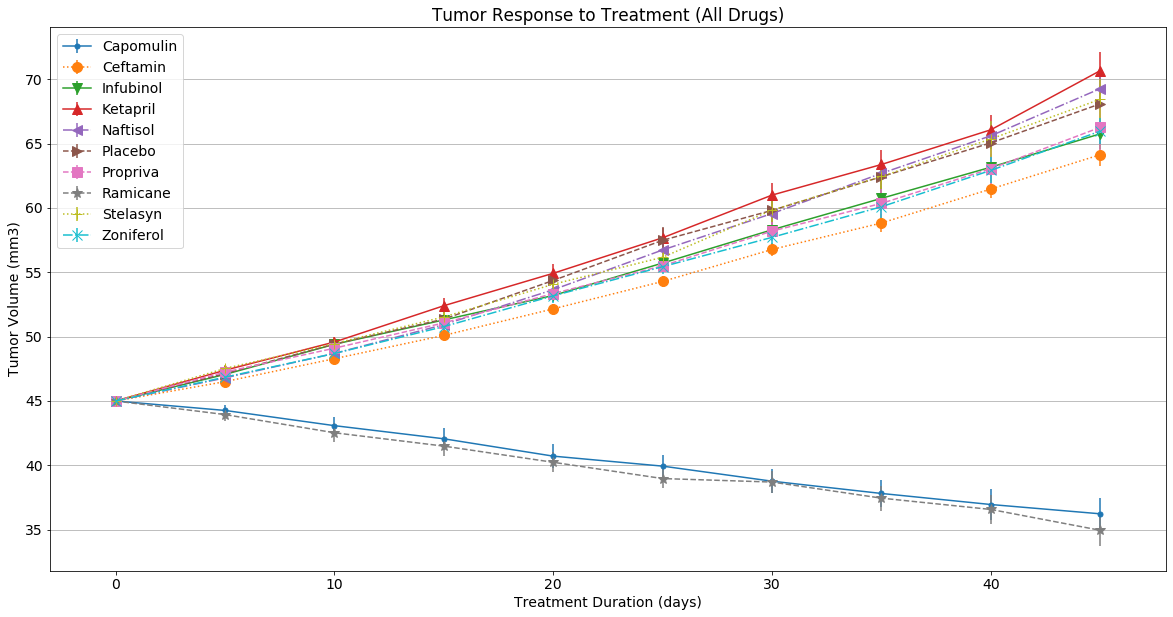

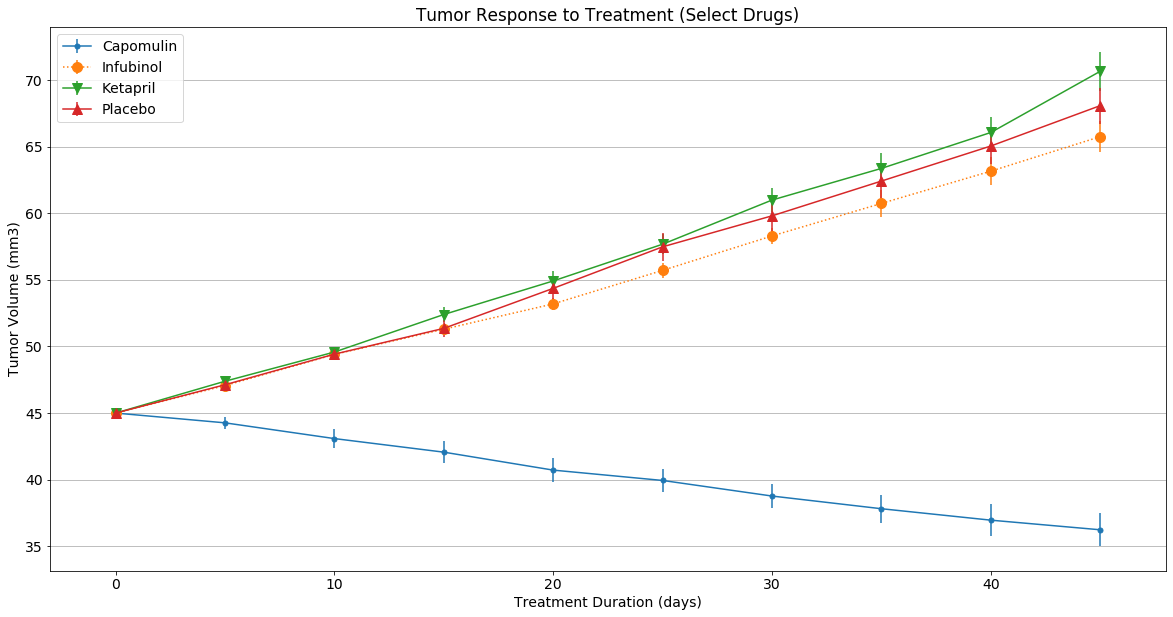

In [6]:
# Plot all drugs
plt = plot_df_error_bars(tumor_vol_mean_df_unstacked, tumor_vol_std_error_df_unstacked)
plt.title("Tumor Response to Treatment (All Drugs)")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")

# Save the Figure
plt.savefig("01 Tumor Response to Treatment (All Drugs).png")

# Show the Figure
plt.show()


# Plot only select drugs shown in solution chart
plt = plot_df_error_bars(tumor_vol_mean_df_unstacked, tumor_vol_std_error_df_unstacked, cols=select_drugs)
plt.title("Tumor Response to Treatment (Select Drugs)")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")

# Save the Figure
plt.savefig("01 Tumor Response to Treatment (Select Drugs).png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
dfm_grouped_by_drug_time = dfm[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"])
metastatic_sites_mean_df = dfm_grouped_by_drug_time.mean()

# Preview DataFrame
metastatic_sites_mean_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint. And preview DataFrame.
metastatic_sites_std_error_df = dfm_grouped_by_drug_time.sem()
metastatic_sites_std_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the DataFrame.
metastatic_sites_mean_df_unstacked = metastatic_sites_mean_df.unstack(0)["Metastatic Sites"]

# Preview that Reformatting worked
metastatic_sites_mean_df_unstacked.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the DataFrame and Preview that Reformatting worked
metastatic_sites_std_error_df_unstacked = metastatic_sites_std_error_df.unstack(0)["Metastatic Sites"]
metastatic_sites_std_error_df_unstacked.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


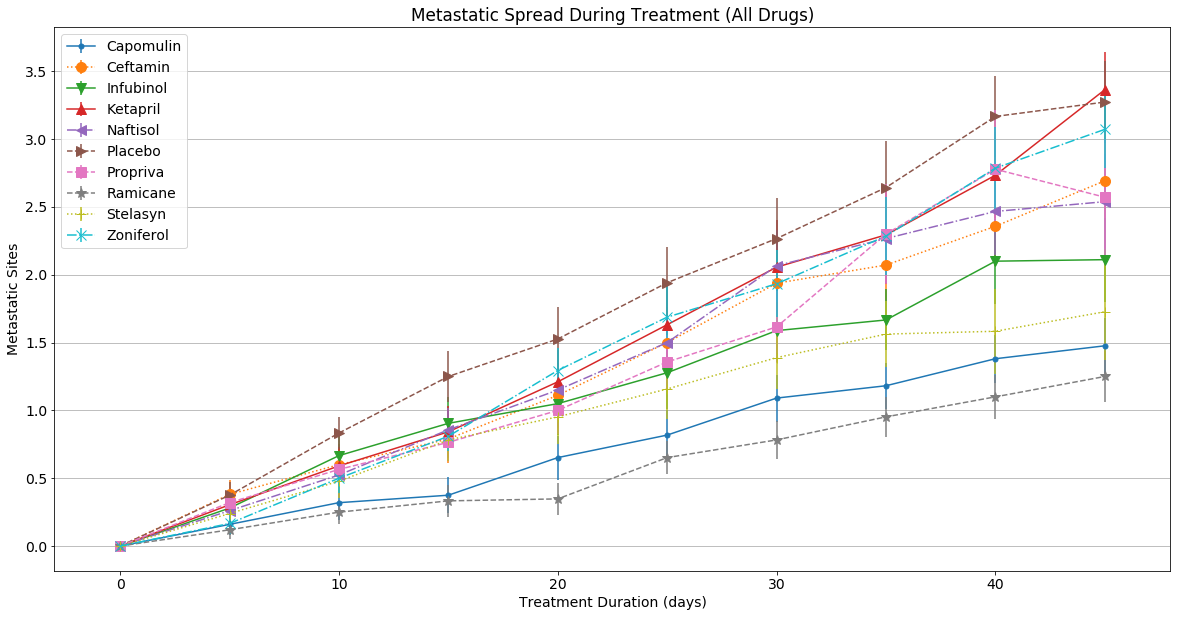

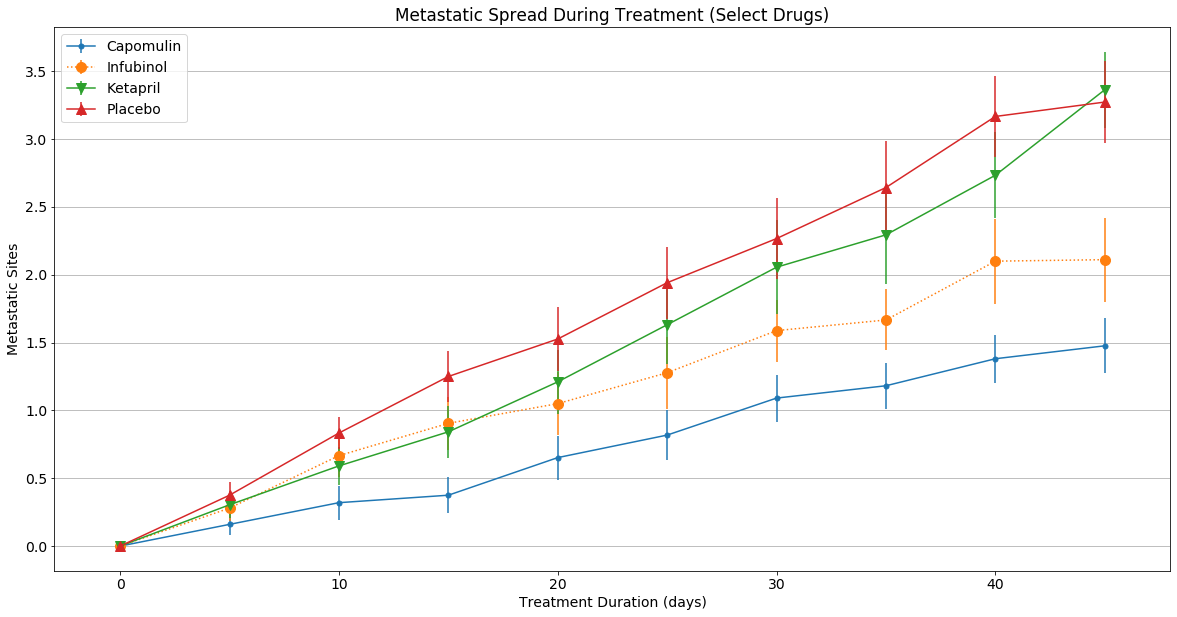

In [11]:
# Plot all drugs
plt = plot_df_error_bars(metastatic_sites_mean_df_unstacked, metastatic_sites_std_error_df_unstacked)
plt.title("Metastatic Spread During Treatment (All Drugs)")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.grid(axis="y")

# Save the Figure
plt.savefig("02 Metastatic Spread During Treatment (All Drugs).png")

# Show the Figure
plt.show()


# Plot only select drugs shown in solution chart
plt = plot_df_error_bars(metastatic_sites_mean_df_unstacked, metastatic_sites_std_error_df_unstacked, cols=select_drugs)
plt.title("Metastatic Spread During Treatment (Select Drugs)")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.grid(axis="y")

# Save the Figure
plt.savefig("02 Metastatic Spread During Treatment (Select Drugs).png")

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_df = dfm_grouped_by_drug_time.count()

# Preview DataFrame
mouse_count_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                        25
          5                        25
          10                       25
          15                       24
          20                       23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df_unstacked = mouse_count_df.unstack(0)["Metastatic Sites"]

# Preview the Data Frame
mouse_count_df_unstacked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


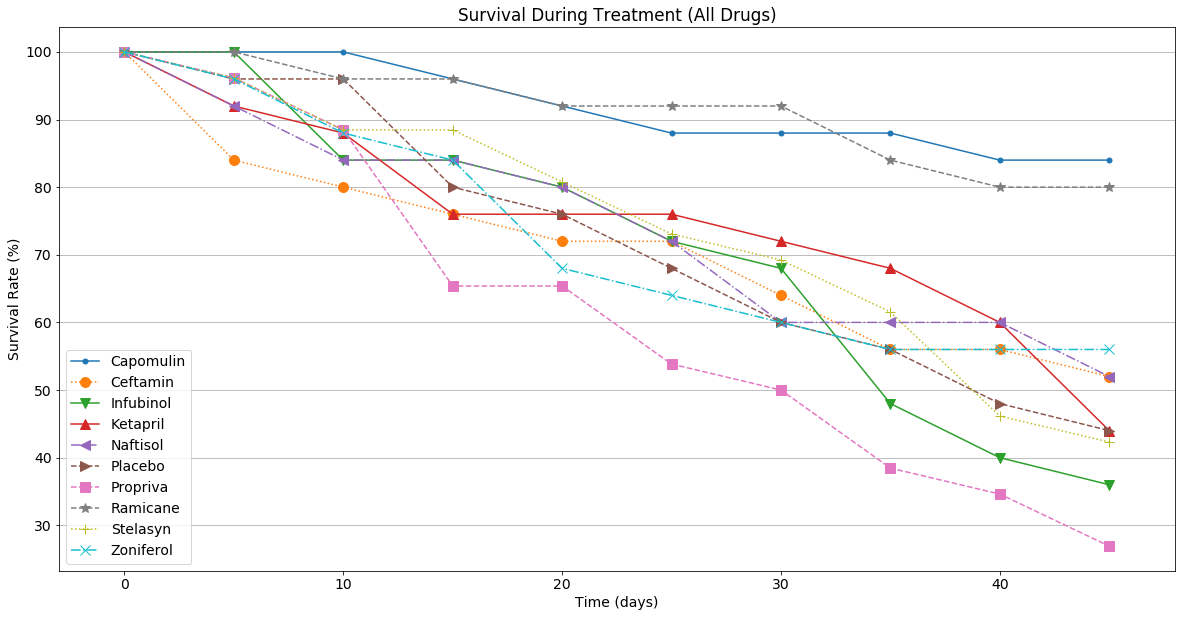

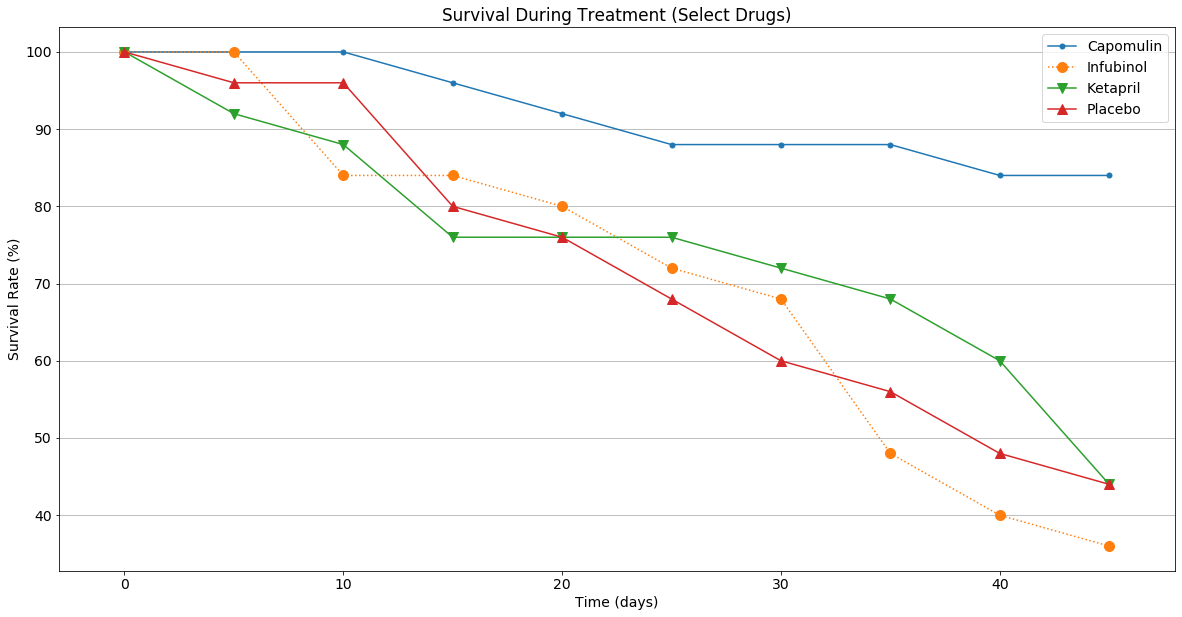

In [14]:
mouse_count_percent_df_unstacked = mouse_count_df_unstacked.divide(mouse_count_df_unstacked.iloc[0] / 100)

# Generate the Plot (Accounting for percentages)
plt = plot_df_error_bars(mouse_count_percent_df_unstacked)
plt.title("Survival During Treatment (All Drugs)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.grid(axis="y")

# Save the Figure
plt.savefig("03 Survival During Treatment (All Drugs)")

# Show the Figure
plt.show()


# Plot only select drugs shown in solution chart
plt = plot_df_error_bars(mouse_count_percent_df_unstacked, cols=select_drugs)
plt.title("Survival During Treatment (Select Drugs)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.grid(axis="y")

# Save the Figure
plt.savefig("03 Survival During Treatment (Select Drugs)")

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_vol_change = round((tumor_vol_mean_df_unstacked.iloc[-1] - tumor_vol_mean_df_unstacked.iloc[0]) / tumor_vol_mean_df_unstacked.iloc[0] * 100, 1)

# Display the data to confirm
tumor_vol_change

Drug
Capomulin   -19.5
Ceftamin     42.5
Infubinol    46.1
Ketapril     57.0
Naftisol     53.9
Placebo      51.3
Propriva     47.2
Ramicane    -22.3
Stelasyn     52.1
Zoniferol    46.6
dtype: float64

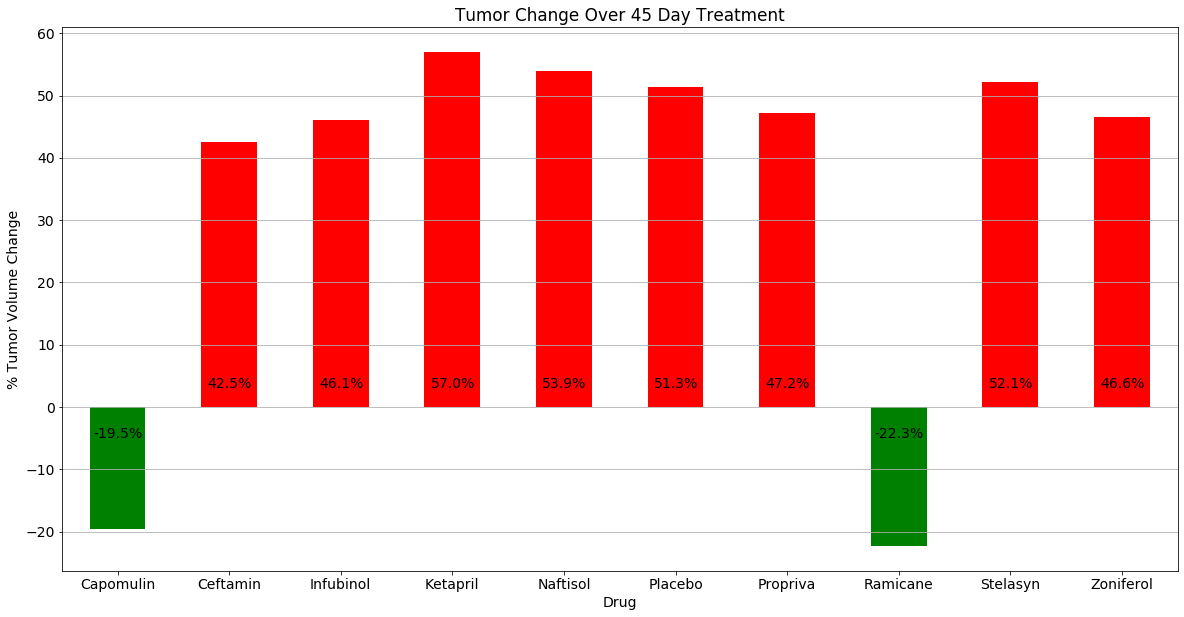

In [16]:
tumor_vol_change.plot(
    kind="bar",
    color=["green" if value < 0 else "red" for value in tumor_vol_change],
)

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(rotation=0)
plt.grid(axis="y")

# Use functions to label the percentages of changes
for i in range(len(tumor_vol_change)):
    plt.text(
        (i - 0.195 if tumor_vol_change[i] > 0 else i - 0.22),
        (3 if tumor_vol_change[i] > 0 else -5),
        f"{tumor_vol_change[i]}%"
    )

# Save the Figure
plt.savefig("04 Tumor Change Over 45 Day Treatment")

# Show the Figure
plt.show()